# This is a notebook to explore HyperSuprimeCam data

The HyperSuprimeCam is a large camera on the Japanese Subaru telescope on Mauna Kea in Hawaii. For the past few years it has undertaken an ambitious survey of a large area of sky in multiple bands. Some of the data are public.
The data-release site is https://hsc-release.mtk.nao.ac.jp, and the direct link to Data Release 2 is https://hsc-release.mtk.nao.ac.jp/doc/index.php/tools-2/.

There is a PSF picker tool, a web-form cutout tool, and client libraries for requesting data via services (which will probably ultimately be what we want to use).

Python script to access the data: https://hsc-gitlab.mtk.nao.ac.jp/ssp-software/data-access-tools/tree/master/pdr2/hscReleaseQuery

Poor-man's way of getting some data to play with:
It looks like you can traverse a directory tree and find some fits files to download, for example in the DEEP observations there are co-adds:
https://hsc-release.mtk.nao.ac.jp/archive/filetree/pdr2_dud/deepCoadd-results/HSC-G/17130/3,0/

## Getting PSFs

Instructions for getting PSFs are at https://hsc-release.mtk.nao.ac.jp/psf/pdr2/manual.html. The web-form PSF picker is https://hsc-release.mtk.nao.ac.jp/psf/pdr2/. 


In [1]:
from astropy.io import fits
import imexam

In [2]:
# Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

In [3]:
hdu = fits.open('HSC/Calexp-HSC-G-17130-3,0.fits')

In [4]:
hdu.info()

Filename: HSC/Calexp-HSC-G-17130-3,0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   ()      
  1                1 CompImageHDU     34   (4200, 4100)   float32   
  2                1 CompImageHDU     51   (4200, 4100)   int32   
  3                1 CompImageHDU     34   (4200, 4100)   float32   
  4                1 BinTableHDU     40   7665R x 7C   [1J, 1J, 1J, 1J, 1J, 64A, 64A]   
  5                1 BinTableHDU     76   20R x 15C   [1J, 1J, 1J, 1J, 1J, 1J, 1J, 1K, 1J, 1J, 1J, 1J, 1J, 1D, 32A]   
  6                1 BinTableHDU     16   136R x 1C   [1QB(28851)]   
  7                1 BinTableHDU     22   134R x 2C   [1D, 1D]   
  8                1 BinTableHDU    103   114R x 19C   [1K, 1D, 1D, 1K, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1J, 1D, 1D, 1D, 1D, 1D, 1D]   
  9                1 BinTableHDU     84   114R x 17C   [1J, 1J, 1J, 1J, 1J, 1J, 1J, 1K, 1J, 1J, 1J, 1J, 1J, 1K, 1J, 1D, 32A]   
 10                1 BinTableHDU 

## Hmm...26 extensions. Better read the documentation
But the first looks like a 4200x4100 compressed image, and I think this is what they are calling "tracts"
It's possible one of these later extensions has PSFs, which would be handy, for example.

In [5]:
img = hdu[1].data

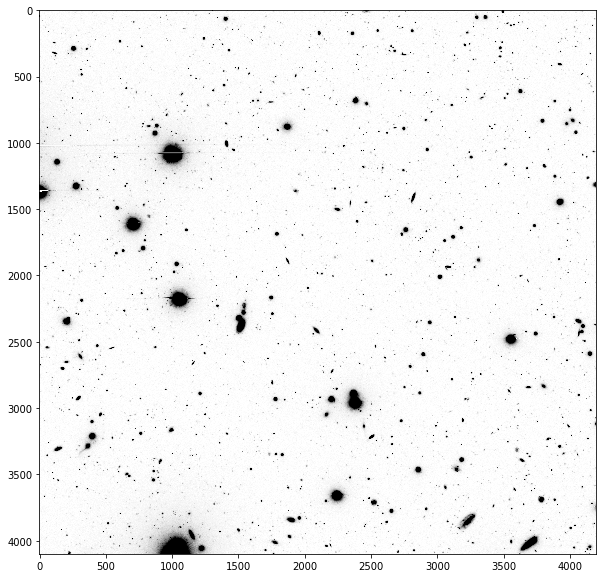

In [6]:
plt.imshow(img,vmin=-0.003,vmax=0.5,cmap=plt.cm.Greys)

# PSF inspection
Went to the PSF picker and gave it the RA & Dec and tract number 17130 and it gave back a PSF. Need to check if it is oversampled or not. Probably not, since the PSF picker doesn't mention that, but let's check the FWHM. Maybe simplest to use imexam?

In [7]:
psfhdu = fits.open('HSC/psf-calexp-pdr2_dud-HSC-G-17130-3,0-242.84167-53.55806.fits')

In [8]:
psfhdu.info()

Filename: HSC/psf-calexp-pdr2_dud-HSC-G-17130-3,0-242.84167-53.55806.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (43, 41)   float64   


In [9]:
viewer1 = imexam.connect()

In [10]:
viewer1.load_fits(psfhdu)


Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image None
xc=20.650049	yc=19.868437
Background per pixel: 0.000088
Max. pix. flux =     0.053
amp =     1.194
fwhm =     9.111


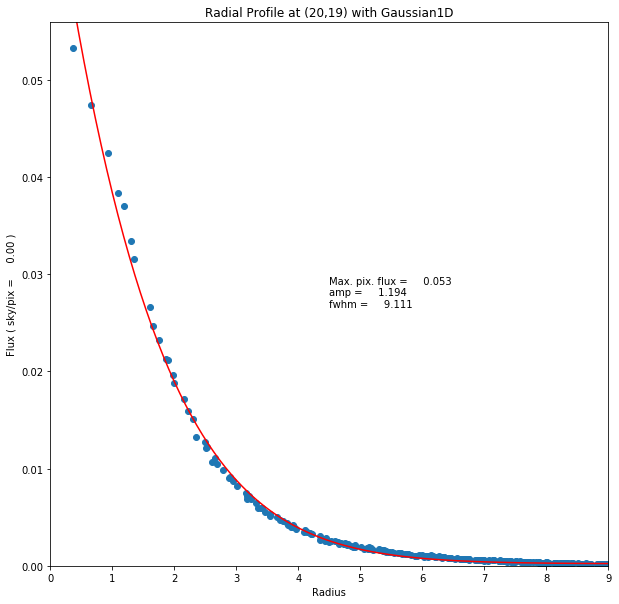

In [12]:
viewer1.imexam()

In [24]:
viewer1.view(img)


Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image None
xc=1541.799481	yc=2278.542936
Background per pixel: 0.995417
Max. pix. flux =   174.418
amp =   172.677
fwhm =     5.395


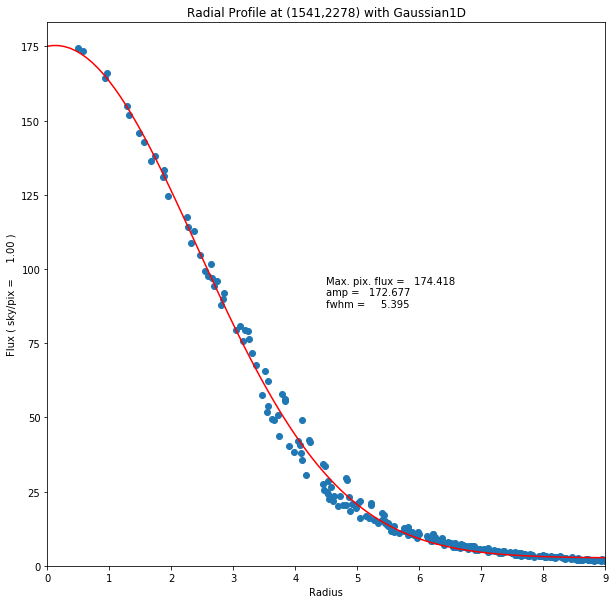

xc=1750.221257	yc=2165.234242
Background per pixel: 0.605188
Max. pix. flux =   127.517
amp =   121.784
fwhm =     4.981


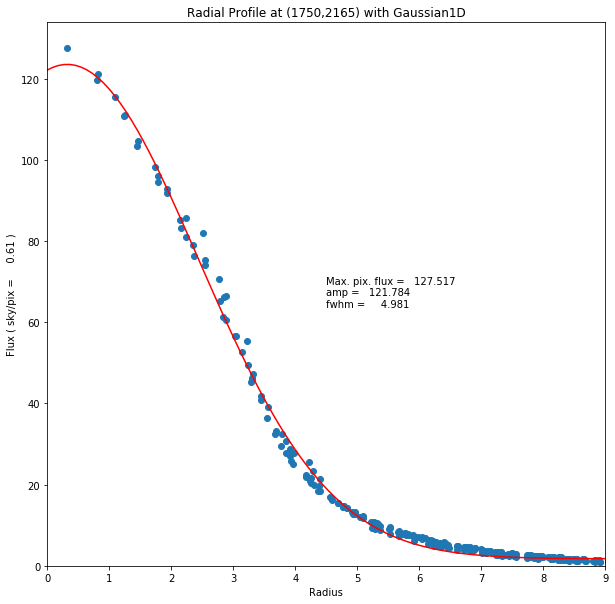

xc=1759.409286	yc=2287.424342
Background per pixel: 0.142918
Max. pix. flux =    70.447
amp =   216.992
fwhm =     6.084


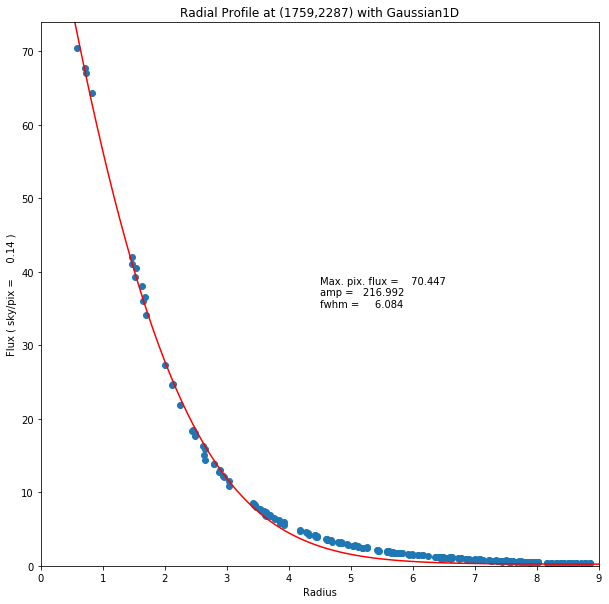

xc=1345.519265	yc=2228.682082
Background per pixel: 0.114490
Max. pix. flux =    53.057
amp =   147.121
fwhm =     5.890


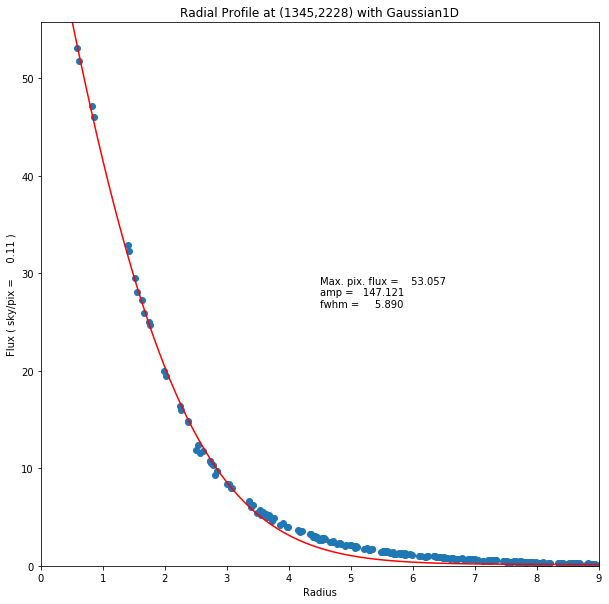

xc=1495.550772	yc=2214.935780
Background per pixel: 0.022868
Max. pix. flux =     1.820
amp =   100.317
fwhm =    10.065


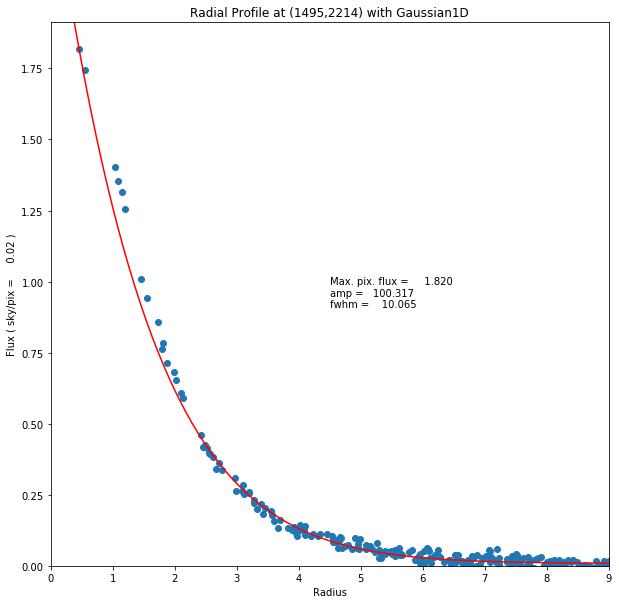

xc=1733.297685	yc=2221.634808
Background per pixel: 0.008818
Max. pix. flux =     1.159
amp =    63.175
fwhm =     8.912


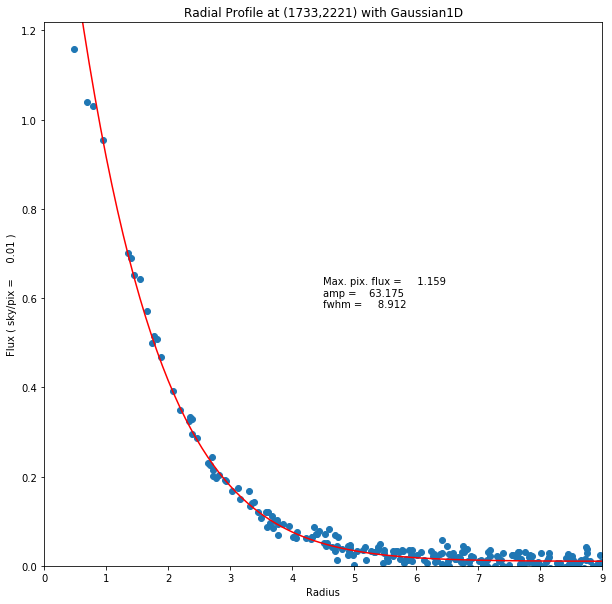

xc=1931.625877	yc=2312.472060
Background per pixel: 0.007559
Max. pix. flux =     2.854
amp =   172.556
fwhm =     9.797


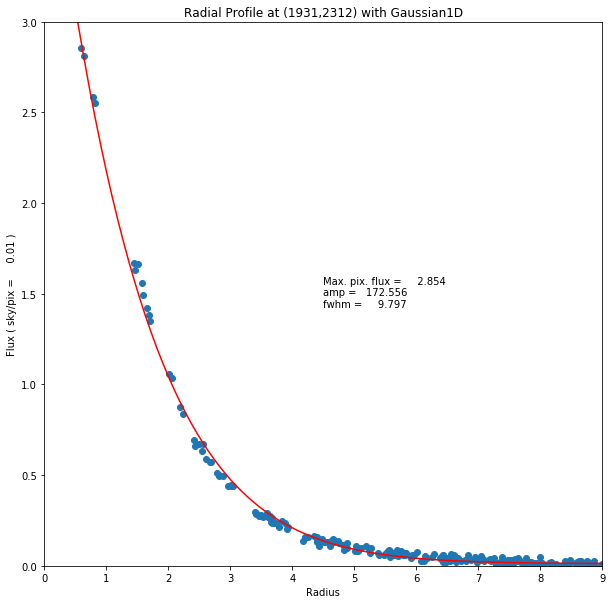

ValueError: not enough values to unpack (expected 3, got 0)

In [25]:
viewer1.imexam()